In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
algos = ["", "ga", "wann"]
envs = ["hopper", "walker2d"]
seeds = range(5)
dfs = []
for seed in seeds:
    for env in envs:
        for algo in algos:
            if len(algo) > 0:
                tmp_df = pd.read_csv(f"{algo}_{env}_uni_{seed}.csv")
                tmp_df["algorithm"] = algo
            else:
                tmp_df = pd.read_csv(f"{env}_uni_{seed}.csv")
                tmp_df["algorithm"] = "uniform"
            tmp_df["env"] = env
            tmp_df["seed"] = seed
            dfs.append(tmp_df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,time,algorithm,env,seed
0,0.0,321.36646,0.000000,uniform,hopper,0
1,1.0,321.36646,10.343892,uniform,hopper,0
2,2.0,375.41592,3.284357,uniform,hopper,0
3,3.0,992.87787,3.456985,uniform,hopper,0
4,4.0,994.62270,3.312063,uniform,hopper,0


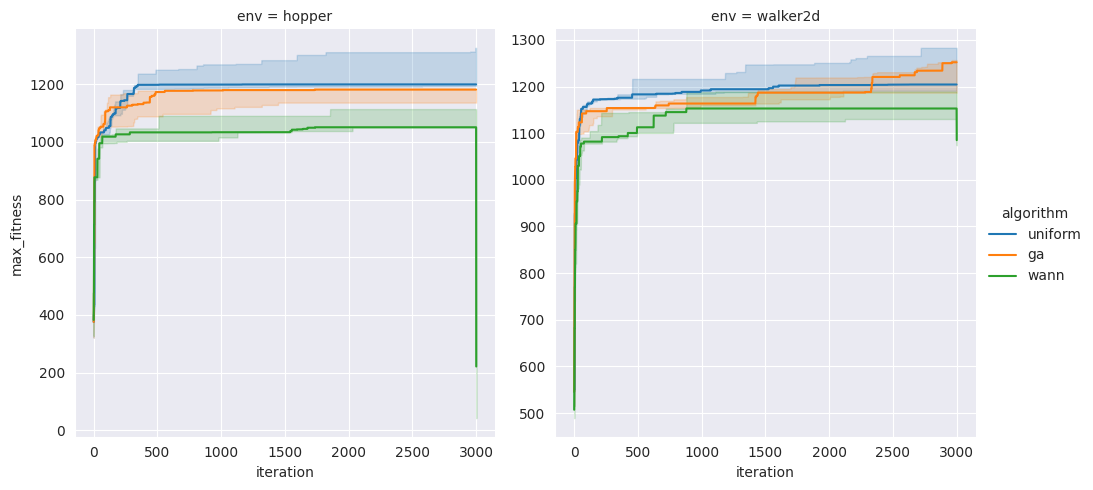

In [10]:
g = sns.relplot(
    data=df,
    x="iteration",
    y="max_fitness",
    hue="algorithm",
    col="env",
    kind="line",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False),
)
plt.show()

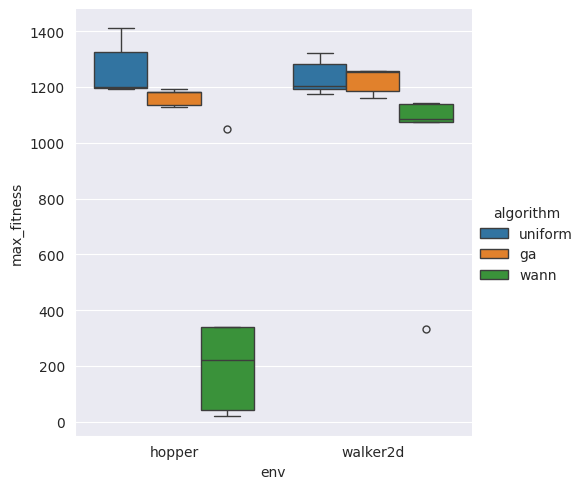

In [8]:
df["max_iteration"] = df.groupby(["algorithm", "env", "seed"])[
    "iteration"].transform("max")
final_df = df[df["iteration"] == df["max_iteration"]].drop(columns="max_iteration")
sns.catplot(final_df, x="env", y="max_fitness", hue="algorithm", kind="box")
plt.show()